# Desafío Número 1
## Limpieza de la base de Properati

### Identificacion de la antiguedad de la propiedad

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Leo el archivo de properati
data = pd.read_csv("properati.csv")

## Hipotesis Numero 1: Las viviendas del amba a estrenar son el 50% más caras que el resto

In [6]:
#Me quedo solo con la info del AMBA
data_amba = data[data['state_name'].isin(['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Capital Federal',\
                                         'Bs.As. G.B.A. Zona Sur'])]

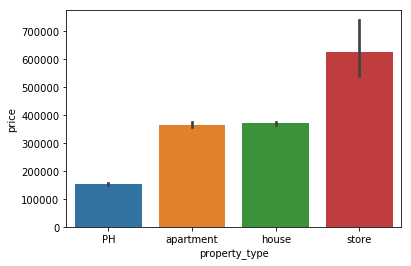

In [33]:
#Cambiar "property_type" por el analisis de "a estrenar" y "otros"
ax = sns.barplot(x="property_type", y="price", data=data_amba)

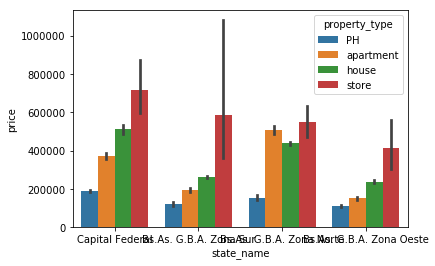

In [13]:
#Cambiar "property_type" por el analisis de "a estrenar" y "otros"
ax = sns.barplot(x="state_name", y="price", hue="property_type", data=data_amba)

In [11]:
#
group_by_ant = data_amba.groupby(by=['state_name', 'property_type']).mean()
group_by_ant

Unnamed: 0   geonames_id        lat  \
state_name               property_type                                          
Bs.As. G.B.A. Zona Norte PH             62395.145178  3.439827e+06 -34.526234   
                         apartment      57913.366033  3.430987e+06 -34.464276   
                         house          56161.109099  3.433279e+06 -34.452230   
                         store          68066.049236  3.440684e+06 -34.509026   
Bs.As. G.B.A. Zona Oeste PH             49986.858048  3.459767e+06 -34.643693   
                         apartment      52335.348259  3.462683e+06 -34.638500   
                         house          40311.100793  3.444318e+06 -34.648204   
                         store          47741.349206  3.450937e+06 -34.645004   
Bs.As. G.B.A. Zona Sur   PH             63980.088916  3.432541e+06 -34.779091   
                         apartment      65993.916107  3.432994e+06 -34.797891   
                         house          68266.567645  3.434999e+06 -34.812459   
                         store          74302.721440  3.433582e+06 -34.789206   
Capital Federal          PH             55298.359409  3.529494e+06 -34.614068   
                         apartment      62555.328809  3.530139e+06 -34.599753   
                         house          49394.151893  3.469355e+06 -34.612492   
                         store          59168.808651  3.578327e+06 -34.604938   

                                              lon          price  \
state_name               property_type                             
Bs.As. G.B.A. Zona Norte PH            -58.562004  152925.210634   
                         apartment     -58.628977  508176.063104   
                         house         -58.686779  437797.764206   
                         store         -58.647135  551540.503676   
Bs.As. G.B.A. Zona Oeste PH            -58.585964  113155.482166   
                         apartment     -58.592921  150857.697652   
                         house         -58.672864  238278.346642   
                         store         -58.640611  413947.668394   
Bs.As. G.B.A. Zona Sur   PH            -58.256410  122159.651007   
                         apartment     -58.253517  195515.726263   
                         house         -58.313567  262997.041139   
                         store         -58.308865  583507.221239   
Capital Federal          PH            -58.458041  190326.580862   
                         apartment     -58.433276  370678.155088   
                         house         -58.461443  510871.285639   
                         store         -58.421277  718502.899160   

                                        price_aprox_local_currency  \
state_name               property_type                               
Bs.As. G.B.A. Zona Norte PH                           2.400446e+06   
                         apartment                    3.548537e+06   
                         house                        7.522320e+06   
                         store                        9.710838e+06   
Bs.As. G.B.A. Zona Oeste PH                           1.949272e+06   
                         apartment                    2.019689e+06   
                         house                        3.855849e+06   
                         store                        7.141665e+06   
Bs.As. G.B.A. Zona Sur   PH                           1.951786e+06   
                         apartment                    2.190729e+06   
                         house                        4.417092e+06   
                         store                        6.924811e+06   
Capital Federal          PH                           3.342457e+06   
                         apartment                    4.329024e+06   
                         house                        8.844615e+06   
                         store                        9.086568e+06   

                                        price_aprox_usd  surface_total_in_m2  \
state_name       

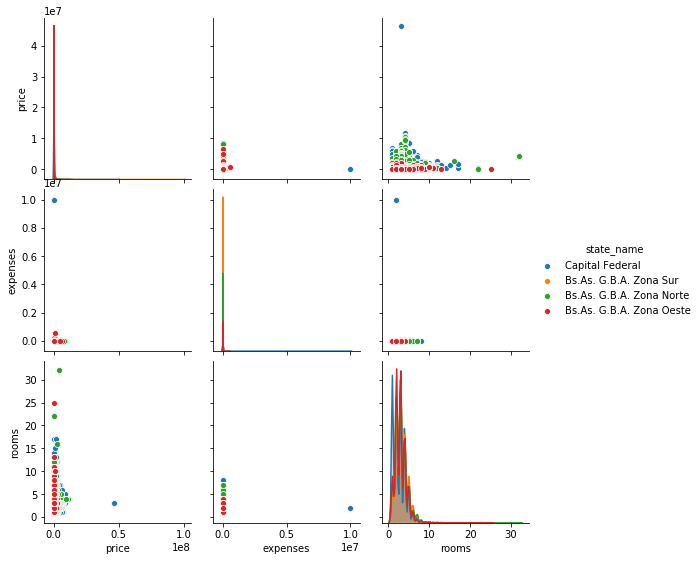

In [31]:
sns.pairplot(data_amba.loc[:, ('price', 'expenses', 'rooms', 'state_name')], hue="state_name")

In [27]:
data_amba.loc[:, ('price', 'expenses')]

,price,expenses
0,62000.0,NaN
1,150000.0,NaN
2,72000.0,NaN
3,95000.0,NaN
6,130000.0,NaN
...,...,...
121214,NaN,NaN
121215,870000.0,10000.0
121216,498000.0,NaN
121217,131500.0,NaN


## Hipotesis Numero 2: Una vivienda con pileta (o piscina) tiene un mayor valor

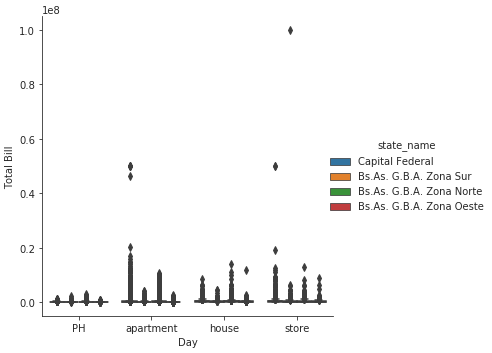

In [36]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("property_type", "price", "state_name", data=data_amba, kind="box")
    g.set_axis_labels("Tipo de vivienda", "Precio de vivienda");

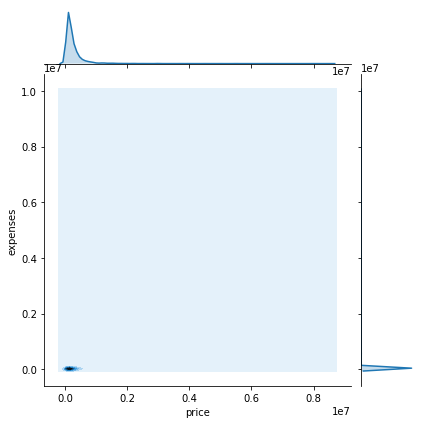

In [37]:
sns.jointplot(x="price", y="expenses", data=data_amba, kind="kde");

## Hipotesis Numero 3: Una vivienda con parrilla (o churrasquera) tiene un mayor valor